In [9]:
!python -m pip install prophet

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = "/content/drive/My Drive/Covid 19 Updates/day_wise.csv"
data = pd.read_csv(path, parse_dates=['Date'])
data

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187


In [4]:
path = "/content/drive/My Drive/Covid 19 Updates/day_wise.csv"
data = pd.read_csv(path)
data

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187


In [5]:
# data.drop(['Province/State'],axis=1,inplace=True)
# data.rename(columns={"Country/Region":"Country"},inplace=True)
data.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [6]:
# Predidction - can be of any value with any form of input
# Forecasting - can be only of date and time input, no division of data
# Data after forecasting will not be very accurate - time series analysis
# Fbprophet - Library in python created by Facebook Company for time series analysis (forecasting)
# There should be only two coloumns (data/time - ds, data-y)

In [7]:
#### Forecasting for Confirmed cases
confirmed = data.groupby('Date')['Confirmed'].sum().reset_index()
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [8]:
confirmed.rename(columns={"Date":"ds","Confirmed":"y"},inplace=True)
confirmed.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [10]:
#### Build the model
from prophet import Prophet
model = Prophet(interval_width=0.95)
# interval width is the confidence level = 95% accurate

In [11]:
#### Train the model
model.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc348owmf/rgtb_oxl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc348owmf/vb8s_gip.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18286', 'data', 'file=/tmp/tmpc348owmf/rgtb_oxl.json', 'init=/tmp/tmpc348owmf/vb8s_gip.json', 'output', 'file=/tmp/tmpc348owmf/prophet_modeloytny4jn/prophet_model-20240115155954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:59:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:59:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [12]:
future_dates = model.make_future_dataframe(periods = 150)
# To create future periods=n days for prediction
future_dates

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
333,2020-12-20
334,2020-12-21
335,2020-12-22
336,2020-12-23


In [13]:
ypred = model.predict(future_dates)
ypred[['ds','yhat','yhat_lower','yhat_upper']].tail(10)
# predicted yhat value will be between lower and upper range
# so the predicted value for 25th june, 91 lakh will be confirmed cases

,ds,yhat,yhat_lower,yhat_upper
328,2020-12-15,4.487886e+07,3.713283e+07,5.341066e+07
329,2020-12-16,4.508863e+07,3.728713e+07,5.368363e+07
330,2020-12-17,4.530257e+07,3.730464e+07,5.406312e+07
331,2020-12-18,4.551776e+07,3.742090e+07,5.425698e+07
332,2020-12-19,4.572542e+07,3.752655e+07,5.450239e+07
333,2020-12-20,4.592296e+07,3.755465e+07,5.486251e+07
334,2020-12-21,4.611754e+07,3.766944e+07,5.515082e+07
335,2020-12-22,4.630679e+07,3.772423e+07,5.540984e+07
336,2020-12-23,4.651656e+07,3.775515e+07,5.580252e+07
337,2020-12-24,4.673050e+07,3.796977e+07,5.588697e+07


In [14]:
confirmed.tail()

,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


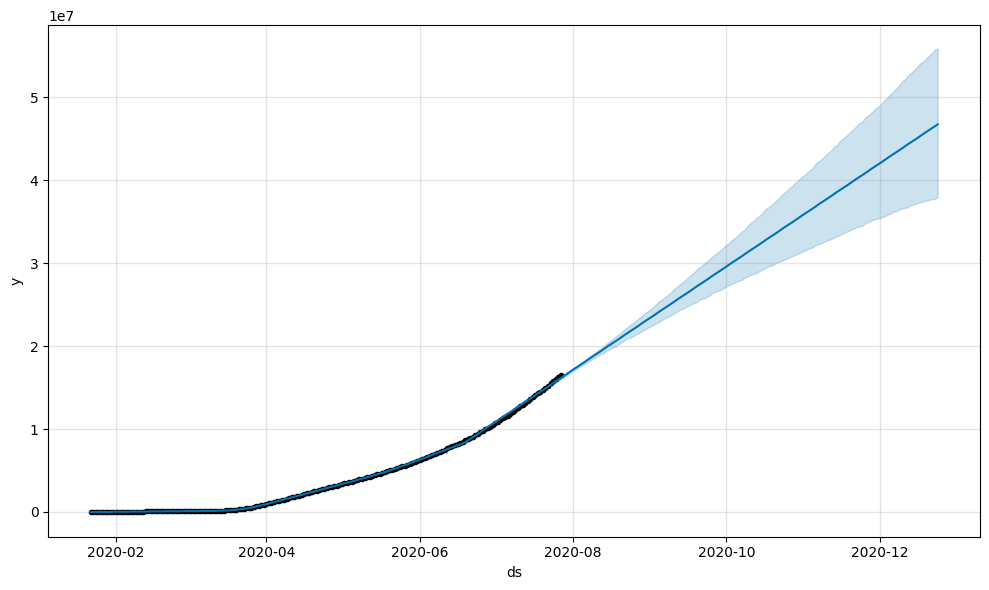

In [15]:
#### Plotting the Graph
confirmed_plot = model.plot(ypred)
# blue dots in graph is actual value
# blue line is predicted

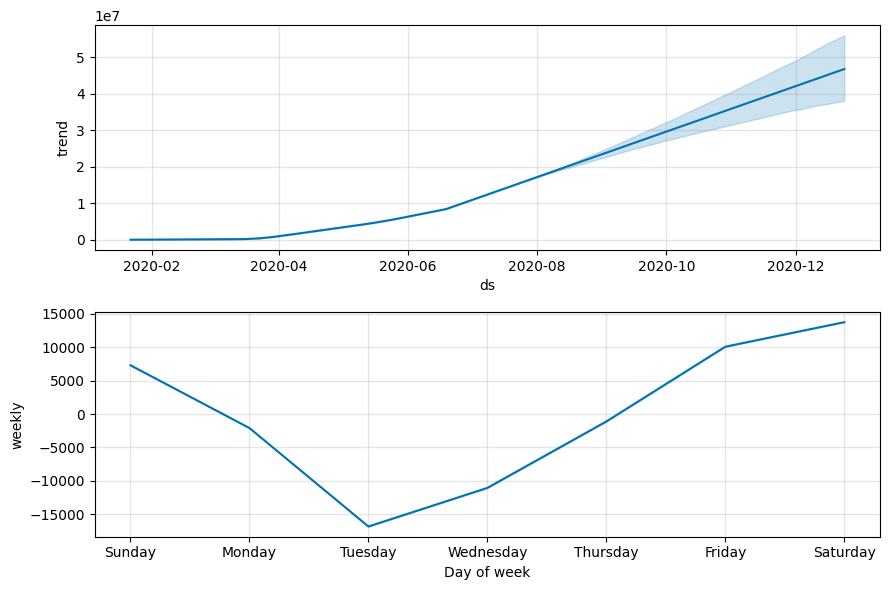

In [16]:
#### Plotting daily(trained value) and monthly change of confirmed cases
confirmed_plot_weekly = model.plot_components(ypred)

In [ ]:
# to download the data use below website
# https://www.kaggle.com/imdevskp/corona-virus-report?select=covid_19_clean_complete.csv
